In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [195]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


First we will convert column names to more understandable names

In [196]:
df.columns=['Win','Runs','At Runs','Hits','Doubles','Triples','Homeruns','Walks','StrikeOut','Stolen Bases','Runs Allowed','Earned Runs','Earned Runs Average','Complete Games','Shutouts','Saves','Errors']

In [197]:
df.head()

,Win,Runs,At Runs,Hits,Doubles,Triples,Homeruns,Walks,StrikeOut,Stolen Bases,Runs Allowed,Earned Runs,Earned Runs Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [198]:
df.shape

(30, 17)

There are 30 rows and 17 columns in our data. But looking at the columns, there are many redundant columns, So multicollinearity might exists between the features

In [199]:
df.isnull().sum()

Win                    0
Runs                   0
At Runs                0
Hits                   0
Doubles                0
Triples                0
Homeruns               0
Walks                  0
StrikeOut              0
Stolen Bases           0
Runs Allowed           0
Earned Runs            0
Earned Runs Average    0
Complete Games         0
Shutouts               0
Saves                  0
Errors                 0
dtype: int64

There are no null values inour dataset.

In [13]:
for col in df.columns:
    print(col,df[col].unique)

Win <bound method Series.unique of 0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Win, dtype: int64>
Runs <bound method Series.unique of 0     724
1     696
2     669
3     622
4     689
5     891
6     764
7     713
8     644
9     748
10    751
11    729
12    661
13    656
14    694
15    647
16    697
17    689
18    655
19    640
20    683
21    703
22    613
23    573
24    626
25    667
26    696
27    720
28    650
29    737
Name: Runs, dtype: int64>
At Runs <bound method Series.unique of 0     5575
1     5467
2     5439
3     5533
4     5605
5     5509
6     5567
7     5485
8     5485
9     5640
10    5511
11    5459
12    5417
13    5544
14    5600
15    5484
16    5631
17    5491
18    5480
19    5571
20    5527
21    54

In [15]:
df.dtypes

Win                      int64
Runs                     int64
At Runs                  int64
Hits                     int64
Doubles                  int64
Triples                  int64
Homeruns                 int64
Walks                    int64
StrikeOut                int64
Stolen Bases             int64
Runs Allowed             int64
Earned Runs              int64
Earned Runs Average    float64
Complete Games           int64
Shutouts                 int64
Saves                    int64
Errors                   int64
dtype: object

All the columns are of numeric type. Our target variable 'Win' is also discrete numeric type. So, this is Regression type of problem

<AxesSubplot:>

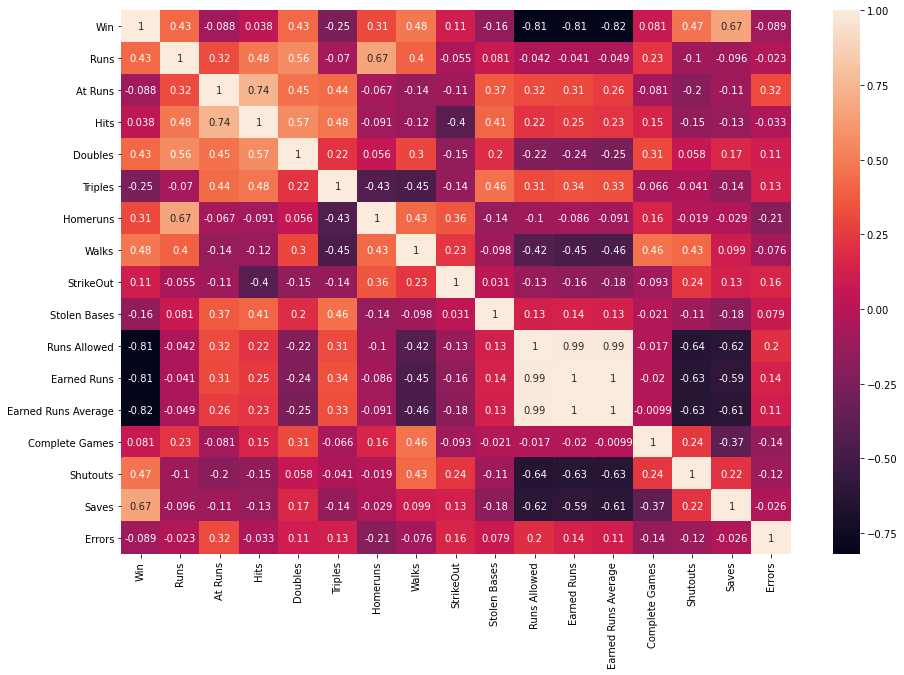

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Hits,At runs,Complete games and errors are least correlated with our target variable.

We can see Runs Allowed, Earned Runs and Earned Runs Average are highly correlated with each other. So, multicollinearity exists. We will need to treat it

In [16]:
df.describe()

,Win,Runs,At Runs,Hits,Doubles,Triples,Homeruns,Walks,StrikeOut,Stolen Bases,Runs Allowed,Earned Runs,Earned Runs Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We can predict some outliers are present in Runs,Earned runs,shutouts and errors. Also, there is some skewness in some columns

<AxesSubplot:ylabel='Frequency'>

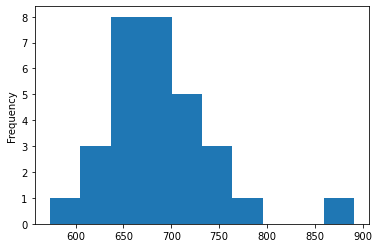

In [30]:
df['Runs'].plot.hist()

We can clearly see an outlier. Rest of the data is normally distributed.

<AxesSubplot:ylabel='Frequency'>

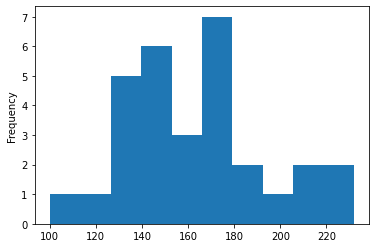

In [35]:
df['Homeruns'].plot.hist()

Majority of the homeruns lies between 130 to 180.

<AxesSubplot:ylabel='Frequency'>

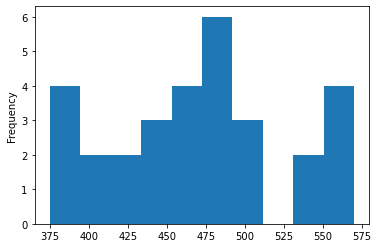

In [36]:
df['Walks'].plot.hist()

The data is quite high at 475 while there are no walks between 500-525

<AxesSubplot:ylabel='Frequency'>

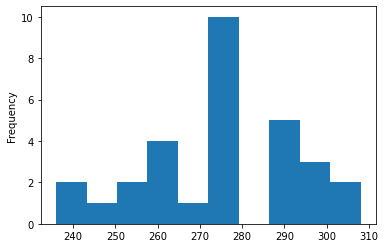

In [33]:
df['Doubles'].plot.hist()

HIghest number of doubles lies between 270 to 280 while the least is 250.

<AxesSubplot:ylabel='Frequency'>

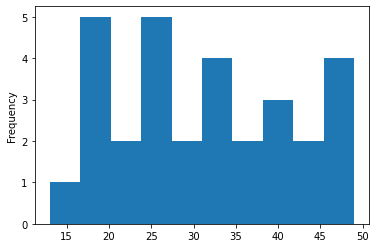

In [34]:
df['Triples'].plot.hist()

We can see 5 major spikes in data rest all the data s equally distributed.

<AxesSubplot:ylabel='Frequency'>

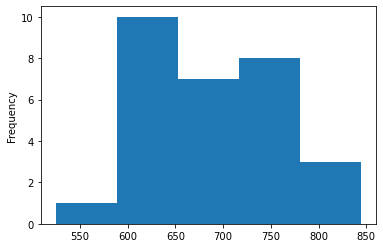

In [239]:
df['Runs Allowed'].plot.hist(bins=5)

The data is present between 600 amd 750. With very few data point at 500-550

<AxesSubplot:ylabel='Frequency'>

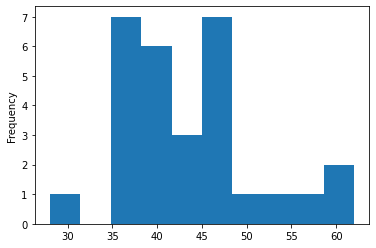

In [233]:
df['Saves'].plot.hist()

Most of the saves lies between 35 and 50

<AxesSubplot:xlabel='Earned Runs', ylabel='Win'>

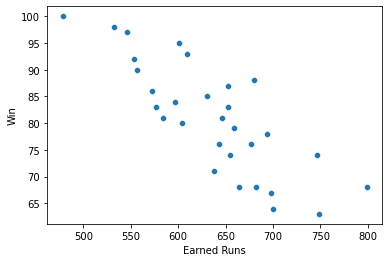

In [49]:
sns.scatterplot(x="Earned Runs", y="Win", data=df)

We can see our target variable and earned runs are highly negatively correlated with each other

<AxesSubplot:xlabel='Shutouts', ylabel='Win'>

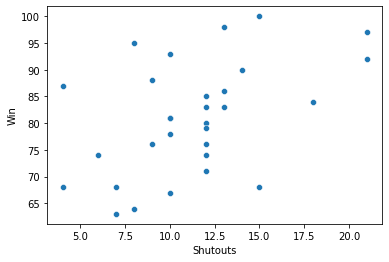

In [51]:
sns.scatterplot(x="Shutouts", y="Win", data=df)

The data is highly spreaded and shows positive correlation with target.

<AxesSubplot:xlabel='Saves', ylabel='Win'>

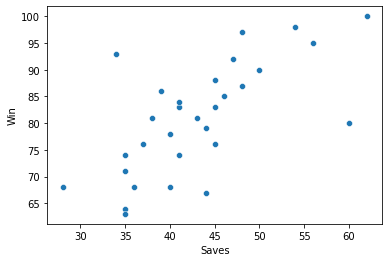

In [50]:
sns.scatterplot(x="Saves", y="Win", data=df)

the data is highly spreaded and shows positive correlation with target variable and the trend is similar to shutouts

<AxesSubplot:xlabel='Runs Allowed', ylabel='Win'>

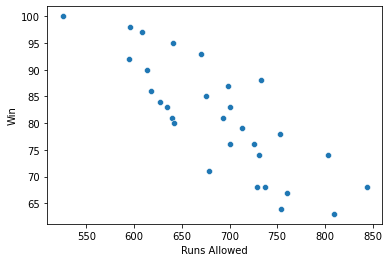

In [52]:
sns.scatterplot(x="Runs Allowed", y="Win", data=df)

Runs Allowed is negatively correlated with win and shows a linear relationship

<AxesSubplot:xlabel='Earned Runs Average', ylabel='Win'>

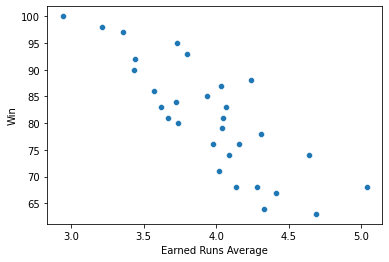

In [53]:
sns.scatterplot(x="Earned Runs Average", y="Win", data=df)

Earned runs average trend is similar to earned runs which clearly shows there is multicollinearity

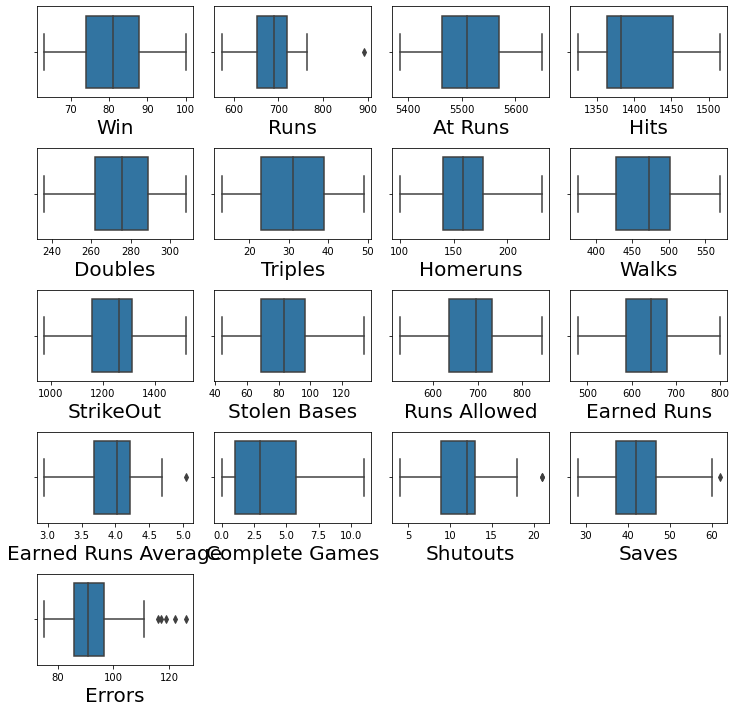

In [57]:
#Univariate Analysis
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

We can see outliers are present in Runs,Earned Runs Average, Shutouts, Saves and errors.

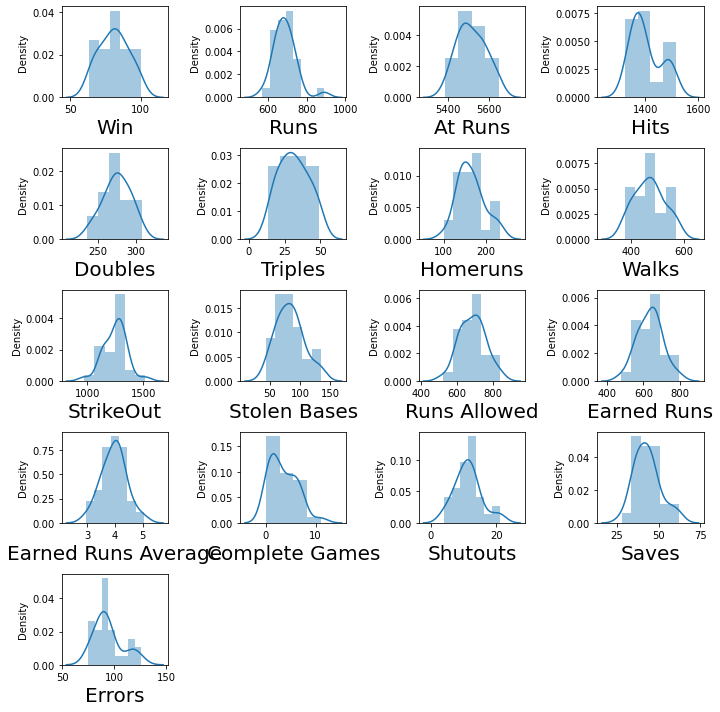

In [56]:
#Bivariate Analysis
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

The distribution is positively skewed in runs,Shutouts, complete games, saves and error

In [200]:
#Removing outliers using z-score
from scipy.stats import zscore
z=np.abs(zscore(df))

In [201]:
df=df[(z<3).all(axis=1)]
df.shape

(29, 17)

After outlier removal, there are 29 rows and 17 columns in our data

In [202]:
#Separting x and y for model evaluation
x=df.drop('Win',axis=1)
y=df[['Win']]

In [203]:
#Checking for skewness
x.skew()

Runs                  -0.215364
At Runs                0.169573
Hits                   0.783772
Doubles               -0.335304
Triples                0.090124
Homeruns               0.450862
Walks                  0.151193
StrikeOut             -0.233815
Stolen Bases           0.494966
Runs Allowed           0.018155
Earned Runs            0.018461
Earned Runs Average    0.016693
Complete Games         0.854980
Shutouts               0.526943
Saves                  0.627480
Errors                 0.840271
dtype: float64

In [204]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
    if x[i].skew()<-0.5:
         x[i]=np.square(x[i])

x.skew() 

Runs                  -0.215364
At Runs                0.169573
Hits                   0.753696
Doubles               -0.335304
Triples                0.090124
Homeruns               0.450862
Walks                  0.151193
StrikeOut             -0.233815
Stolen Bases           0.494966
Runs Allowed           0.018155
Earned Runs            0.018461
Earned Runs Average    0.016693
Complete Games         0.219277
Shutouts              -0.298136
Saves                  0.280963
Errors                 0.671748
dtype: float64

In [205]:
#lets bring all features to a common scale
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_=mm.fit_transform(x)
x_=pd.DataFrame(x_,columns=x.columns)
x_

,Runs,At Runs,Hits,Doubles,Triples,Homeruns,Walks,StrikeOut,Stolen Bases,Runs Allowed,Earned Runs,Earned Runs Average,Complete Games,Shutouts,Saves,Errors
0,0.790576,0.719697,0.909479,0.955224,0.805556,0.300000,0.041667,0.000000,0.666667,0.363636,0.383178,0.376190,0.320941,0.352190,0.856693,0.289897
1,0.643979,0.310606,0.136142,0.611940,0.861111,0.430769,0.333333,0.533945,0.288889,0.548589,0.545171,0.538095,0.320941,0.599243,0.564749,0.247247
2,0.502618,0.204545,0.382313,1.000000,0.444444,0.315385,0.822917,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.484014,0.353181,0.092544
3,0.256545,0.560606,0.307972,0.358209,0.388889,0.276923,0.151042,0.473394,0.266667,0.551724,0.514019,0.495238,0.739838,0.420549,0.320886,0.552477
4,0.607330,0.833333,1.000000,0.791045,1.000000,0.392308,0.416667,0.524771,0.433333,0.871473,0.834891,0.809524,0.739838,0.599243,0.254506,0.247247
5,1.000000,0.689394,0.392893,0.537313,0.166667,0.861538,0.932292,0.466055,0.211111,0.542320,0.542056,0.519048,0.420551,0.000000,0.648703,0.393767
6,0.732984,0.378788,0.249208,0.149254,0.194444,0.900000,0.223958,0.656881,0.000000,0.526646,0.523364,0.528571,0.000000,0.484014,0.506684,0.046672
7,0.371728,0.378788,0.318623,0.626866,0.527778,0.515385,0.317708,0.618349,0.477778,0.366771,0.392523,0.380952,0.202180,0.599243,0.953301,0.434272
8,0.916230,0.965909,0.899376,0.865672,0.555556,0.469231,0.536458,0.321101,0.300000,0.714734,0.672897,0.652381,0.420551,0.484014,0.416110,0.474213
9,0.931937,0.477273,0.508606,0.641791,0.527778,0.553846,0.666667,0.477064,0.633333,0.652038,0.629283,0.619048,0.591178,0.420549,0.564749,0.881159


In [206]:
#Checking for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["variables"] = x_.columns
vif["VIF"] = [variance_inflation_factor(x_.values, i) for i in range(x_.shape[1])]

vif

,variables,VIF
0,Runs,48.498060
1,At Runs,56.004698
2,Hits,26.794065
3,Doubles,21.213371
4,Triples,13.822916
5,Homeruns,44.025355
6,Walks,12.394493
7,StrikeOut,22.735894
8,Stolen Bases,6.404263
9,Runs Allowed,1022.157246


We can see Runs Allowed, Earned Runs and Earned Runs Average have very high VIF, Similarly,Runs At Runs and Homeruns also havehigh VIF. Most of the features have VIF greater than 10 which is not desirable, so we will drop the high Multicollinar column

In [207]:
x_.drop(['Runs','At Runs','Doubles','Triples','Runs Allowed','StrikeOut','Earned Runs','Errors','Shutouts','Complete Games'],axis=1,inplace=True)

In [209]:
from sklearn.model_selection import train_test_split

### Finding the best Random State

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_,y,test_size=.20,random_state=i)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9731221133172842  on Random_state  108


### Model Evaluation

In [211]:
#splitting data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x_,y,test_size=.20,random_state=maxRS)

In [212]:
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 

In [221]:
model=[KNeighborsRegressor(),RandomForestRegressor(),LinearRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(m)
    print(m.score(x_train,y_train))
    print("error: ")
    print("Mean absolute error: ",mean_absolute_error(y_test,predm))
    print("Mean squared error: ",mean_squared_error(y_test,predm))
    print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score",r2_score(y_test,predm))
    print("\n\n")

KNeighborsRegressor()
0.5508844349001831
error: 
Mean absolute error:  5.0
Mean squared error:  34.946666666666665
Root mean squared error:  5.911570575292717
r2_score 0.7314663820704376



RandomForestRegressor()
0.9200109739123519
error: 
Mean absolute error:  4.188333333333335
Mean squared error:  20.47215000000001
Root mean squared error:  4.524616005806461
r2_score 0.8426899893276414



LinearRegression()
0.8155173454173121
error: 
Mean absolute error:  1.628348546722189
Mean squared error:  3.497858308570097
Root mean squared error:  1.8702562146855968
r2_score 0.9731221133172842





In [218]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(KNeighborsRegressor(),x_,y,cv=2,scoring='r2')
cv_mean=cv_score.mean()
print(cv_mean)

0.33560145312159806


In [219]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(RandomForestRegressor(),x_,y,cv=4,scoring='r2')
cv_mean=cv_score.mean()
print(cv_mean)

0.4802973902478662


In [220]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LinearRegression(),x_,y,cv=4,scoring='r2')
cv_mean=cv_score.mean()
print(cv_mean)

0.7009268462754588


### Regularization

In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [223]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predls=ls.predict(x_test)
lss=r2_score(y_test,predls)
print('r2_score:', lss)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,predls))
print("Mean squared error: ",mean_squared_error(y_test,predls))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predls)))

r2_score: 0.9548166173770487
error: 
Mean absolute error:  2.377807060491712
Mean squared error:  5.880115210792415
Root mean squared error:  2.4248948865450672


### Hyper-Parameter Tuning

In [226]:
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"],'n_estimators':[100,500],'max_depth': [4,5,6,7,8]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}


In [232]:
rf=RandomForestRegressor(criterion="mse",max_features="log2",n_estimators=500,max_depth=6)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_decision))
print("Mean squared error: ",mean_squared_error(y_test,pred_decision))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_decision)))


R2 Score: 80.92583013667503
error: 
Mean absolute error:  4.3640911375661275
Mean squared error:  24.8229127249104
Root mean squared error:  4.982259801025073


After doing all the posiible evaluation, we can see we have high r2 score in Linear and lasso regression. But aftr checking the cross val score and in terms of MSE, linear regression have least MAE,MSE and RMSE. So, We will select linear regression as our best model.

### Saving the Model

In [242]:
import joblib
joblib.dump(LinearRegression(),'baseball.pkl')

['baseball.pkl']